# Network Analysis with NetworkX

#### [NetworkX](https://networkx.org) is a Python library for creating, analysing, and visulaising networks
* written in pure Python
* flexible and easy to install
* relatively scalable

#### Other Python libraries for network analysis geared towards performance
* [python-igraph](https://igraph.org/python/)  
    * written in C/C++ with interfaces to Python and R 
    * pros: performance and speed; cons: instalation can be a hurdle
* [graph-tool](https://graph-tool.skewed.de)
    * written in C++
    * fast algorithms and powerful visualisations

In [1]:
# Import networkx and other packages we will use

import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats.stats import pearsonr

### Representations of an undirected network
Yang, Keller, Zheng. SAGE. 2016.

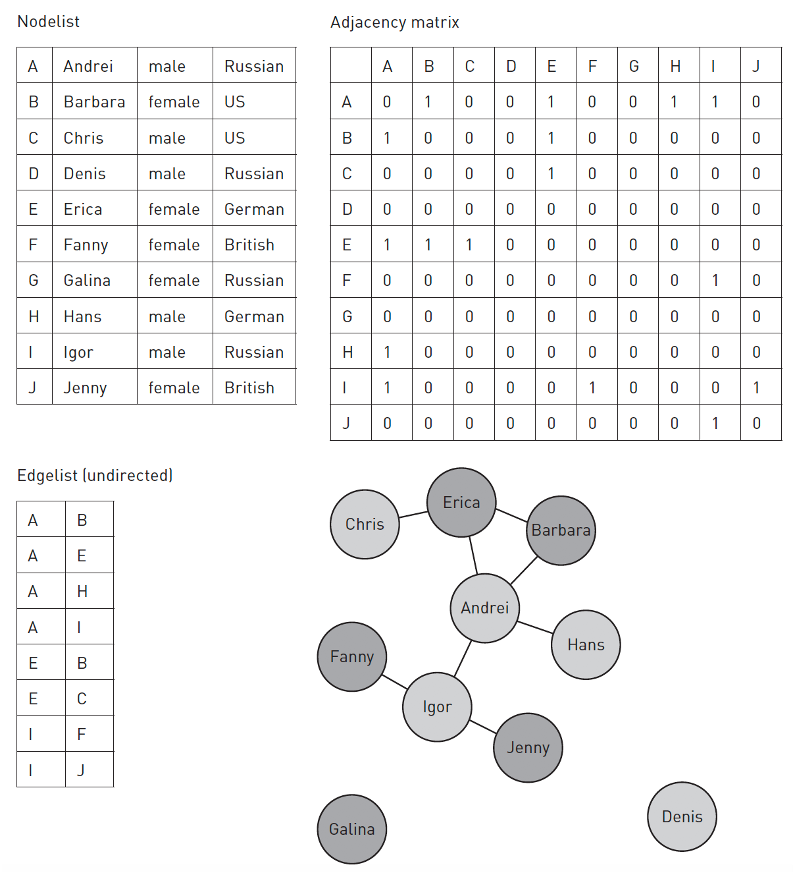

### Representations of a directed network
Yang, Keller, Zheng. SAGE. 2016.

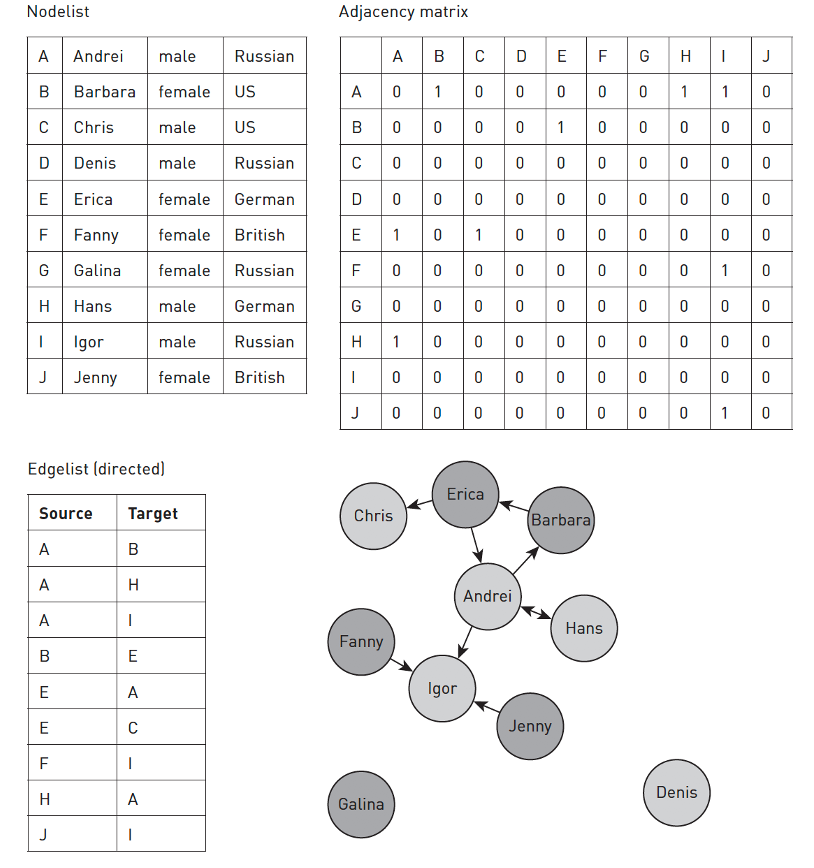

### Create a network

In [2]:
# Create an empty network

# G = nx.DiGraph() # Creates a directed network

# Add nodes


# Or add a set of nodes from a list


In [3]:
# Add edges

# Or add a set of edges from a list


In [4]:
# Check the created edges


In [5]:
# Check basic properties of the graph



In [6]:
# Draw a network


In [7]:
# Basic network properties


In [8]:
# Compute betweenness centrality


In [9]:
# Compute eigenvector centrality


### Add node attributes

In [10]:
# Add attributes to existing nodes



In [11]:
# Assign different colour to nodes with different attributes
# node_color = ['#a5b41f' if G.nodes[v]["gender"] == "female"
#    else '#1fb4a5' for v in G]

In [12]:
# Plot the network with node colours representing gender categories 


In [13]:
# Assortativity for node attributes — similarity of connections in the network with respect to the gender attribute
# "Similarity breeds connection" On homophily in social networks, see McPherson et al. Am. Soc. Rew. https://doi.org/10.1146/annurev.soc.27.1.415



In [14]:
# Assortativity for node degree



### Directed network

In [15]:
# Create an empty directed network
DG = nx.DiGraph()

# Add nodes
DG.add_nodes_from([1, 2, 3, 4, 5, 6])

# Add edges
DG.add_edges_from([(1, 2),(2, 4),(1, 4), (3, 4), (1, 5), (2, 6), (5,6)])

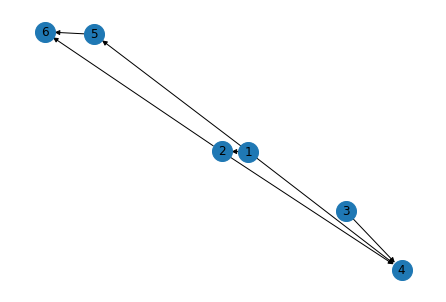

In [16]:
# Draw the directed network

nx.draw(DG, with_labels=True,node_size=400)

In [17]:
# Basic network properties

DG.in_degree()
# basic network roperties
print("node out_degree out_degree")
for v in nx.nodes(DG):
    print(f"{v} {DG.out_degree(v)} {DG.in_degree(v)}")

node out_degree out_degree
1 3 0
2 2 1
3 1 0
4 0 3
5 1 1
6 0 2


In [18]:
# Compute betweenness_centrality

nx.betweenness_centrality(DG, normalized=True)

{1: 0.0, 2: 0.025, 3: 0.0, 4: 0.0, 5: 0.025, 6: 0.0}

> #### Discussion: How network diagnostics differ across directed and undirected networks?

## An Example Network — Star Wars Episode IV: A New Hope

In this section we use a [small weighted network reconstructed from the movie Star Wars Episode IV: A New Hope](http://evelinag.com/blog/2015/12-15-star-wars-social-network/). [See also this network analysis' tutorial in R](https://cdn.rawgit.com/pablobarbera/data-science-workshop/master/sna/01_networks_intro.html). Each node represents a character and each edge represents the number of times a pair of characters appeared together in a scene of the movie. Edges are undirected and weighted.

In [19]:
# A quick view of the network

!head /Users/valentindanchev/Documents/star-wars-network.csv 

In [20]:
# Read a weighted edge list via csv

import csv
weighted_edges = []
with open('/Users/valentindanchev/Documents/star-wars-network.csv', 'r') as f:
    filereader = csv.reader(f, delimiter=",", quotechar='"')
    next(filereader) # skips header row
    for row in filereader:
            weighted_edges.append(row)

In [21]:
# Check the result

weighted_edges

[['C-3PO', 'R2-D2', '17'],
 ['LUKE', 'R2-D2', '13'],
 ['OBI-WAN', 'R2-D2', '6'],
 ['LEIA', 'R2-D2', '5'],
 ['HAN', 'R2-D2', '5'],
 ['CHEWBACCA', 'R2-D2', '3'],
 ['DODONNA', 'R2-D2', '1'],
 ['CHEWBACCA', 'OBI-WAN', '7'],
 ['C-3PO', 'CHEWBACCA', '5'],
 ['CHEWBACCA', 'LUKE', '16'],
 ['CHEWBACCA', 'HAN', '19'],
 ['CHEWBACCA', 'LEIA', '11'],
 ['CHEWBACCA', 'DARTH VADER', '1'],
 ['CHEWBACCA', 'DODONNA', '1'],
 ['CAMIE', 'LUKE', '2'],
 ['BIGGS', 'CAMIE', '2'],
 ['BIGGS', 'LUKE', '4'],
 ['DARTH VADER', 'LEIA', '1'],
 ['BERU', 'LUKE', '3'],
 ['BERU', 'OWEN', '3'],
 ['BERU', 'C-3PO', '2'],
 ['LUKE', 'OWEN', '3'],
 ['C-3PO', 'LUKE', '18'],
 ['C-3PO', 'OWEN', '2'],
 ['C-3PO', 'LEIA', '6'],
 ['LEIA', 'LUKE', '17'],
 ['BERU', 'LEIA', '1'],
 ['LUKE', 'OBI-WAN', '19'],
 ['C-3PO', 'OBI-WAN', '6'],
 ['LEIA', 'OBI-WAN', '1'],
 ['MOTTI', 'TARKIN', '2'],
 ['DARTH VADER', 'MOTTI', '1'],
 ['DARTH VADER', 'TARKIN', '7'],
 ['HAN', 'OBI-WAN', '9'],
 ['HAN', 'LUKE', '26'],
 ['GREEDO', 'HAN', '1'],
 ['HAN', 'JABB

In [22]:
# Read the edge list .csv file via pandas


In [23]:
# Create a graph object using the from_pandas_edgelist function


In [24]:
# Check the graph



In [25]:
# Returns the number of edges in a network


In [26]:
# Returns total weight sum


In [27]:
# Check the weight of the edge between a pair of nodes


In [28]:
# Specify figure size

# Draw the Star Wars Episode IV network 

# Draw edge weights


### [netwulf: simple and interactive network visualization in Python](https://netwulf.readthedocs.io/en/latest/index.html)
Visualising networks using NetworkX can get complicated. But you can always pass a networkx Graph-objects to other tools to easily create beautifully looking network visualizations. Netwulf is such an interactive visualization tool for networkx Graph-objects.

<img src='https://raw.githubusercontent.com/benmaier/netwulf/master/img/logo_small.png' width="400" height="200">

In [29]:
# Install and import netwulf
! pip install netwulf
from netwulf import visualize

In [30]:
# You can now do interactive styling of your network visualization in the browser



In [31]:
# Write the network into a Gephi gexf file



# Local node-level network diagnostics

In [32]:
# Node degree - number of edges adjacent to that node



In [33]:
# Plot a histogram for node degrees


In [34]:
# Node strenght - sum of the edge weights adjacent to the node


In [35]:
# Plot a histogram for node degrees



In [36]:
# Plot node degree versus weights



In [37]:
# Correlation between node degree and strenght
from scipy.stats.stats import pearsonr

# Print the pearson correlation coefficient and the associated p-value


In [38]:
# Compute betweenness centrality — unweighted



In [39]:
# Compute betweenness centrality — weighted


In [40]:
# Compute eigenvector centrality



In [41]:
# Compute closeness centrality


In [42]:
# Compute the number of triangles



In [43]:
# Compute clustering


In [44]:
# Instead of repeating the sort procedure for each centrality diagnostic we could define a function



In [45]:
# Compute the average shortest path for the network



In [46]:
# Get the distance from Luke to any other character



In [47]:
# Get the shortes path between any two characters
